In [1]:
!pip install git+git://github.com/linalgo/linalgo-sdk.git requests pillow

  Cloning git://github.com/linalgo/linalgo-sdk.git to /private/var/folders/y_/z7rsj30x4z10qrwzkcwpgnrw0000gn/T/pip-req-build-8jznl3rb
  Running command git clone -q git://github.com/linalgo/linalgo-sdk.git /private/var/folders/y_/z7rsj30x4z10qrwzkcwpgnrw0000gn/T/pip-req-build-8jznl3rb
You should consider upgrading via the '/Users/tomohiro/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import requests, io
from PIL import Image

from linalgo.annotate.models import Document, Annotation, Entity
from linalgo.hub.client import LinalgoClient
from linalgo.annotate.bbox import draw_bounding_boxes

In [4]:
client = LinalgoClient(token='615caa329be0d2e1d529a7f0b368cb3b43b62745', api_url='https://prod.linhub.api.linalgo.com/v1')
task = client.get_task('a9b4a03b-3af5-476f-8656-c69a32ea9866', verbose=True)

Retrivieving task with id a9b4a03b-3af5-476f-8656-c69a32ea9866...
Retrieving annotators... (9 found)
Retrieving entities... (8 found)
Retrieving documents... (348 found)
Retrieving annotations... (35049 found)


In [5]:
doc = task.documents[0]
response = requests.get(doc.content)
img = Image.open(io.BytesIO(response.content))

In [6]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [7]:
img.save("a_doc.png")

In [8]:
!ls

Janice_data_exp.ipynb a_doc.png             resources
Tomo_data_exp.ipynb   contour1.png
__pycache__           gcv.py


In [9]:
import numpy as np

In [10]:
doc.annotations[0]

Annotation::furi

In [11]:

doc.content

'https://storage.googleapis.com/book-extraction-linalgo-com/はじめての日本語能力試験 N1単語3000/cd52a5fd-7120-49fc-b07a-aefd63877960-160.png'

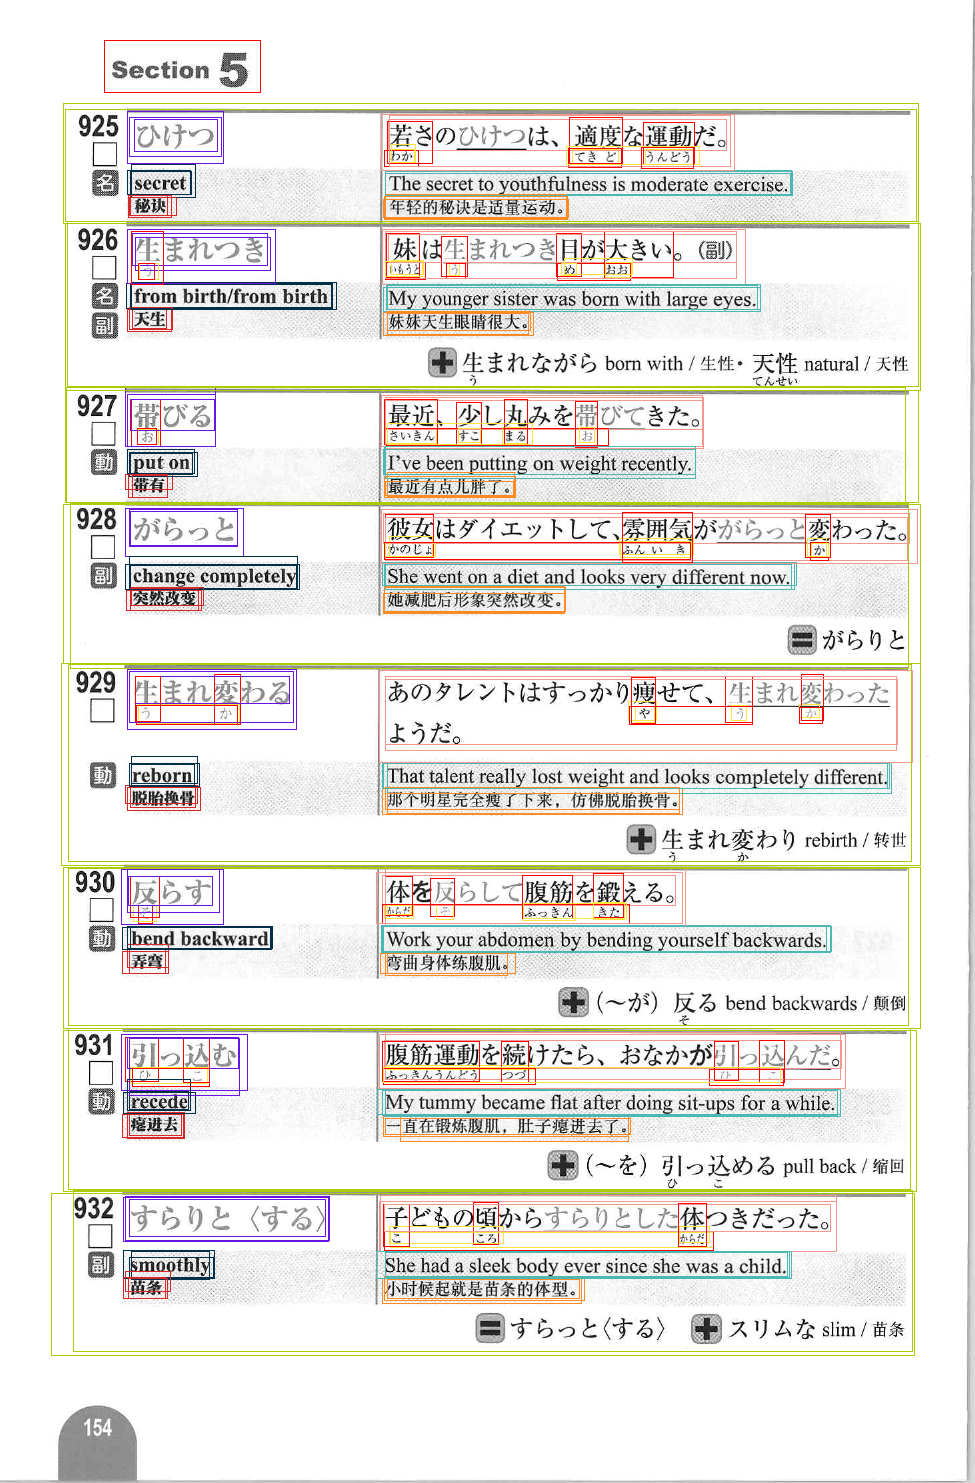

In [12]:
draw_bounding_boxes(img, doc.annotations)

In [13]:
doc.content

'https://storage.googleapis.com/book-extraction-linalgo-com/はじめての日本語能力試験 N1単語3000/cd52a5fd-7120-49fc-b07a-aefd63877960-160.png'

In [14]:
len(task.documents)

348

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
task.documents[0].annotations[1].entity

Entity::word-jp

In [17]:
type(task.documents[0].annotations[11].entity.name)

NoneType

In [18]:
annotation = task.documents[0].annotations[1]


In [19]:
a = annotation.target.selectors[0]
#top-left, top-right, bottom-right, bottom-left

In [20]:
a

{(125.5766129032258, 508.2862903225806), (243.18010752688167, 508.2862903225806), (243.18010752688167, 556.125), (125.5766129032258, 556.125)}

In [21]:
X = int(a.top)
Y = int(a.left)
W = int(a.width)
H = int(a.height)

In [22]:
X = int(a.left)
Y = int(a.top)
W = int(a.width)
H = int(a.height)

In [23]:
type(X)

int

In [24]:
import cv2 

In [25]:
origin_img = 'a_doc.png'
cv2_img = cv2.imread(origin_img)

[125, 508, 117, 47]


True

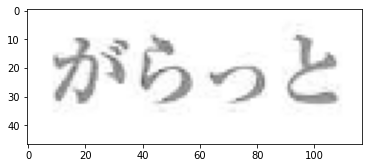

In [26]:
#### cropped_image = img[Y:Y+H, X:X+W]
print([X,Y,W,H])
cropped_image = cv2_img[Y:Y+H, X:X+W]
plt.imshow(cropped_image)
cv2.imwrite('contour1.png', cropped_image)

In [27]:
!ls

Janice_data_exp.ipynb a_doc.png             resources
Tomo_data_exp.ipynb   contour1.png
__pycache__           gcv.py


In [28]:
cv2_img.shape

(1483, 975, 3)

In [29]:
cropped_image.shape

(47, 117, 3)

In [30]:
annotation.target.selectors[0].height

47.83870967741939

In [31]:
len(task.documents[0].annotations)

258

In [32]:
!ls ../textbook_project


__init__.py data        gcv.py


In [33]:
import cv2 
import os
from textbook_project.gcv import *

ent_list =[]
coord_list = []
text_list = []
for i in range(len(task.documents)): 
    document = task.documents[i]
    response = requests.get(document.content)
    img = Image.open(io.BytesIO(response.content))
    img_dir = f"resources/{i}"
    try:
        os.makedirs(img_dir)
    except:
        print("dir exits")
    img_path = f"resources/{i}/original.png"
    img.save(img_path)
    cv2_img = cv2.imread(img_path)
    img.save(img_path)
    for ant in range(len(document.annotations)): 
        annotation = document.annotations[ant]
        entity = annotation.entity.name
        coordinates = annotation.target.selectors[0]
        ent_list.append(entity)
        coord_list.append(coordinates)
        crop_image(img_dir, coordinates, entity, ant)
        text = detect_text(img_dir, ant, entity)
        text_list.append(text)

dir exits


KeyboardInterrupt: 

In [ ]:
df= pd.DataFrame(ent_list)
df.columns = ['Entity']
df['top'] = pd.DataFrame(top)
df['bottom'] = pd.DataFrame(bottom)
df['left'] = pd.DataFrame(left)
df['right'] = pd.DataFrame(right)
df['area'] = pd.DataFrame(area)
df['width'] = pd.DataFrame(width)
df['height'] = pd.DataFrame(height)



In [275]:
df['h/w'] = df['height'] / df['width']

In [276]:
df.head()


,Entity,top,bottom,left,right,area,width,height,h/w
0,furi,706.229289,722.086944,635.904748,654.405346,293.376106,18.500598,15.857655,0.857143
1,word-jp,508.286290,556.125000,125.576613,243.180108,5625.999436,117.603495,47.838710,0.406780
2,word-en,284.773735,307.334395,130.839900,331.468626,4526.316439,200.628725,22.560660,0.112450
3,item,503.441061,668.355041,70.102798,908.956585,138338.716319,838.853787,164.913980,0.196594
4,sent-en,925.918816,952.525678,381.808477,830.134111,11928.538498,448.325634,26.606863,0.059347


In [277]:
df.describe()

,top,bottom,left,right,area,width,height,h/w
count,70098.000000,70098.000000,70098.000000,70098.000000,7.009800e+04,70098.000000,70098.000000,70098.000000
mean,682.702079,726.559922,249.124514,555.744753,2.185834e+04,306.620240,43.857844,0.213940
std,347.424695,347.353414,148.562135,293.980199,4.286205e+04,250.846322,45.233425,0.187477
min,0.000000,78.353466,7.718756,94.369855,5.423352e-01,0.736434,0.736434,0.022857
25%,386.696237,431.880142,128.753858,234.375699,2.417177e+03,92.407059,20.043956,0.091703
50%,668.582720,712.705882,140.843780,624.482043,5.755073e+03,225.232557,24.409412,0.143791
75%,975.182877,1020.382929,385.394175,856.565391,1.659147e+04,468.156089,49.312789,0.283951
max,1416.806154,1473.923706,888.636626,2280.279739,1.167503e+06,1565.702326,745.673699,10.000000


In [278]:
# len(df)
# df = df.drop_duplicates() # Remove duplicates
# len(df)

In [279]:
df['Entity'].isna().sum()

230

In [281]:
df = df.dropna()
df.isnull().sum().sort_values(ascending=False)

Entity    0
top       0
bottom    0
left      0
right     0
area      0
width     0
height    0
h/w       0
dtype: int64

In [282]:
df['Entity'].isna().sum()

0

In [194]:
import matplotlib.pyplot as plt

(array([3.2687e+04, 2.0950e+03, 1.3600e+02, 1.3000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.42335196e-01, 1.16750793e+05, 2.33501043e+05, 3.50251293e+05,
        4.67001544e+05, 5.83751794e+05, 7.00502044e+05, 8.17252295e+05,
        9.34002545e+05, 1.05075280e+06, 1.16750305e+06]),
 <BarContainer object of 10 artists>)

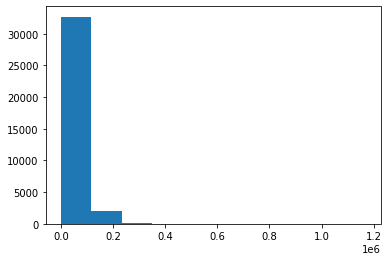

In [195]:
plt.hist(df['area'])

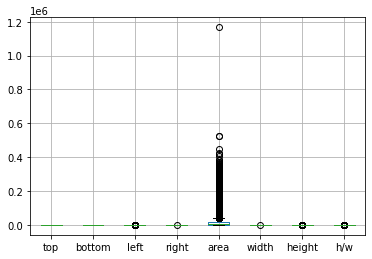

In [196]:
df.boxplot();

In [197]:
df[df['area'] >0.7].count()

Entity    34932
top       34932
bottom    34932
left      34932
right     34932
area      34932
width     34932
height    34932
h/w       34932
dtype: int64

In [198]:
df.describe()

,top,bottom,left,right,area,width,height,h/w
count,34934.000000,34934.000000,34934.000000,34934.000000,3.493400e+04,34934.000000,34934.000000,34934.000000
mean,683.105432,726.999219,248.665269,555.903290,2.191838e+04,307.238021,43.893787,0.212450
std,347.159538,347.100309,148.021945,294.114510,4.291950e+04,250.944435,45.291461,0.182684
min,41.281812,106.153231,7.718756,94.369855,5.423352e-01,0.736434,0.736434,0.022857
25%,387.159647,432.418082,128.752627,234.355035,2.435410e+03,92.534067,20.070423,0.091670
50%,669.187842,713.098683,140.687739,624.604706,5.767560e+03,226.658824,24.409412,0.143419
75%,975.464482,1020.652941,385.339191,856.914044,1.674342e+04,468.676964,49.312789,0.282717
max,1416.806154,1473.923706,888.636626,2280.279739,1.167503e+06,1565.702326,745.673699,10.000000


In [199]:
df[df.area ==df.area.max()]

,Entity,top,bottom,left,right,area,width,height,h/w
1872,item,214.567076,960.240775,714.577413,2280.279739,1.167503e+06,1565.702326,745.673699,0.476255


In [200]:
indexNames = df[df.area ==df.area.max()].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [201]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['top', 'bottom', 'left', 'right', 'area', 'width']]) 

df['top'],  df['bottom'], df['left'], df['right'], df['area'], df['width']= scaler.transform(df[['top', 'bottom', 'left', 'right', 'area', 'width']]).T
df.head()

,Entity,top,bottom,left,right,area,width,height,h/w
0,furi,0.483414,0.450319,0.713104,0.631530,0.000560,0.019065,15.857655,0.857143
1,word-jp,0.339510,0.328982,0.133790,0.167807,0.010752,0.125424,47.838710,0.406780
2,word-en,0.177018,0.147087,0.139765,0.267367,0.008650,0.214529,22.560660,0.112450
3,item,0.335988,0.411035,0.070817,0.918577,0.264396,0.899486,164.913980,0.196594
4,sent-en,0.643127,0.618797,0.424659,0.829692,0.022797,0.480362,26.606863,0.059347


In [202]:
df[['area']]

,area
0,0.000560
1,0.010752
2,0.008650
3,0.264396
4,0.022797
...,...
35044,0.229256
35045,0.014453
35046,0.006555
35047,0.006553


In [213]:
df = df[['Entity', 'area', 'h/w']]
df['Entity'].unique()

array(['furi', 'word-jp', 'word-en', 'item', 'sent-en', 'word-zh',
       'sent-zh', 'sent-jp'], dtype=object)

In [204]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3)
X_train = train_data.drop(['Entity'], axis = 1)
y_train = train_data.Entity
X_test = test_data.drop(['Entity'], axis = 1)
y_test = test_data.Entity
X_train

,area,h/w
22690,0.001116,0.333333
19482,0.267099,0.187879
12185,0.002086,0.163934
11114,0.001391,0.419355
17537,0.002930,0.473684
...,...,...
30965,0.012146,0.068966
4872,0.001706,0.272727
31664,0.293988,0.201597
2490,0.021364,0.059867


In [205]:
df.Entity.unique()

array(['furi', 'word-jp', 'word-en', 'item', 'sent-en', 'word-zh',
       'sent-zh', 'sent-jp'], dtype=object)

In [206]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.7985687022900764

In [207]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
cv_results = cross_validate(neigh, X_train, y_train, cv=5, scoring="accuracy")
cv_results['test_score'].mean()

0.7953213677808117

In [208]:
from sklearn.model_selection import learning_curve

train_sizes = [250,500,750,1000,3000, 4000, 5000, 6000, 8000, 10000]
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(), X=X_train, y=y_train, train_sizes=train_sizes, cv=5, scoring="accuracy")

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

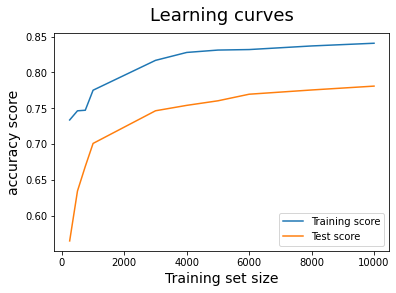

In [209]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [210]:
!pip install pytesseract

You should consider upgrading via the '/Users/tomohiro/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [211]:
!pip install opencv-python

You should consider upgrading via the '/Users/tomohiro/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [212]:
import pytesseract
import cv2 


In [45]:
img = cv2.imread('../sample.png')

In [46]:
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'This is the first line of\nthis text example.\n\nThis is the second line\nof the same text.\n\x0c'

In [47]:
img = cv2.imread('a_doc.png')

In [48]:
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Section 5\n925 ipo PSO, MEENA,\noO bin cae 5AeS\n8 secret The secret to youthfulness is moderate exercise.\nBik APRSHYRRUUEIE IS) .\n926 ene KiEENORAAKAV, BD)\nOo 5 wo3e BB\nB from birth/from birth My younger sister was born with large eyes.\nFk KEI K\nAEE M2285 bom with / ete Rte natural / KH:\n3 chan\n927 HOS Hil, DLAASHOCAR.\nOs BURA Fo ES B\nputon T’ve been putting on weight recently.\naH HA SLE T\n928 ZiBok BHAI A LY LC SWABS Ee Bbot\noO DOLL BAW S o\nchange completely She went on a diet and looks very different now.\nREE UWL a TER ERAS.\nBoE\n928 "ENDS DOIVY MEF OIVMET, /EEVB Do:\nLIK.\nreborn That talent really lost weight and looks completely different.\nWBenea Bert ISP WLR SEAT POR, BEM BERT.\nAES BED Y rebirth / Hil |\n3 :\n930 eet (RE)LD LCM ERR 3.\nOe Bot Boe BL\nbend backward Work your abdomen by bending yourself backwards.\nwey Ty SSL .\n(~28) Ke bend backwards / fits]\n931 Hob WUMERTES, BRPDY|oUAL.\nO] = OEAIKED 9S F =\nrecede My tummy became flat after doing sit-ups fo

In [49]:
custom_config = r'-l jpn+eng+chi_sim --psm 4'
pytesseract.image_to_string(img, config=custom_config)

'Section  5\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n925 ひけっ        着きのひけつは、適度な運動だ。\nてきど     んどう\n图   Secret                                The secret to youthfulness is moderate exercise.\nBik                            年轻的秘诀是适量运动。\n926 生まれっき       妹 は生まれつき目が大きい。(@)\n;                        いう\nB  from birth/from birth         My younger sister was born with large eyes.\nEG) *                            eR RANMA AC,\n生まれながら bom with /生性・ 天性 natural / 天性\nそんせい\n927 帯びる               最近、少し丸みを稚びてきた。\nお                               い        こ\n   puton                                T’ve been putting on weight recently.\n带有                            最近有点儿胖了。\n928 がらっと        彼女はダイエットして、雰半和ががらっと変わった。\nかのセト                        ふんい\n   change completely                She went on a diet and looks very different now.\n突然改变                        她减肥后形象突然改变。\n\n \n\n \n\n929 二まれ変わる\n\n \n\n \n\nあのタレン トはすっかり痩せて、  生ま\nようだ。\n\n \n\n \n\n \n\n \n\n   reborn             

In [50]:
pytesseract.get_languages()

['afr',
 'amh',
 'ara',
 'asm',
 'aze',
 'aze_cyrl',
 'bel',
 'ben',
 'bod',
 'bos',
 'bre',
 'bul',
 'cat',
 'ceb',
 'ces',
 'chi_sim',
 'chi_sim_vert',
 'chi_tra',
 'chi_tra_vert',
 'chr',
 'cos',
 'cym',
 'dan',
 'deu',
 'div',
 'dzo',
 'ell',
 'eng',
 'enm',
 'epo',
 'equ',
 'est',
 'eus',
 'fao',
 'fas',
 'fil',
 'fin',
 'fra',
 'frk',
 'frm',
 'fry',
 'gla',
 'gle',
 'glg',
 'grc',
 'guj',
 'hat',
 'heb',
 'hin',
 'hrv',
 'hun',
 'hye',
 'iku',
 'ind',
 'isl',
 'ita',
 'ita_old',
 'jav',
 'jpn',
 'jpn_vert',
 'kan',
 'kat',
 'kat_old',
 'kaz',
 'khm',
 'kir',
 'kmr',
 'kor',
 'kor_vert',
 'lao',
 'lat',
 'lav',
 'lit',
 'ltz',
 'mal',
 'mar',
 'mkd',
 'mlt',
 'mon',
 'mri',
 'msa',
 'mya',
 'nep',
 'nld',
 'nor',
 'oci',
 'ori',
 'osd',
 'pan',
 'pol',
 'por',
 'pus',
 'que',
 'ron',
 'rus',
 'san',
 'sin',
 'slk',
 'slv',
 'snd',
 'snum',
 'spa',
 'spa_old',
 'sqi',
 'srp',
 'srp_latn',
 'sun',
 'swa',
 'swe',
 'syr',
 'tam',
 'tat',
 'tel',
 'tgk',
 'tha',
 'tir',
 'ton',
 'tur

In [51]:
import numpy as np
from pytesseract import Output


In [52]:
img = cv2.imread('a_doc.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [53]:
len(d['block_num'])

504

In [4]:
import matplotlib.pyplot as plt

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	975	1483	-1	
2	1	1	0	0	0	112	53	136	35	-1	
3	1	1	1	0	0	112	53	136	35	-1	
4	1	1	1	1	0	112	53	136	35	-1	
5	1	1	1	1	1	112	57	97	31	96	Section
5	1	1	1	1	2	220	53	28	35	96	5
2	1	2	0	0	0	127	104	783	16	-1	
3	1	2	1	0	0	127	104	783	16	-1	
4	1	2	1	1	0	127	104	783	16	-1	
5	1	2	1	1	1	127	104	783	16	95	 
2	1	3	0	0	0	93	142	24	2	-1	
3	1	3	1	0	0	93	142	24	2	-1	
4	1	3	1	1	0	93	142	24	2	-1	
5	1	3	1	1	1	93	142	24	2	95	 
2	1	4	0	0	0	93	165	24	1	-1	
3	1	4	1	0	0	93	165	24	1	-1	
4	1	4	1	1	0	93	165	24	1	-1	
5	1	4	1	1	1	93	165	24	1	95	 
2	1	5	0	0	0	92	256	25	1	-1	
3	1	5	1	0	0	92	256	25	1	-1	
4	1	5	1	1	0	92	256	25	1	-1	
5	1	5	1	1	1	92	256	25	1	95	 
2	1	6	0	0	0	92	142	2	137	-1	
3	1	6	1	0	0	92	142	2	137	-1	
4	1	6	1	1	0	92	142	2	137	-1	
5	1	6	1	1	1	92	142	2	137	95	 
2	1	7	0	0	0	115	142	2	138	-1	
3	1	7	1	0	0	115	142	2	138	-1	
4	1	7	1	1	0	115	142	2	138	-1	
5	1	7	1	1	1	115	142	2	138	95	 
2	1	8	0	0	0	92	278	24	2	-1	
3	

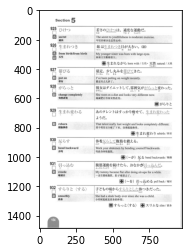

In [15]:
import cv2
import pytesseract

img = cv2.imread('a_doc.png')

h, w, c = img.shape
boxes = pytesseract.image_to_data(img) 
for b in boxes.splitlines():
    #b = b.split(' ')
    #print(b[1],b[2],b[3],b[4])
    print(b)
    #img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)



plt.imshow(img)


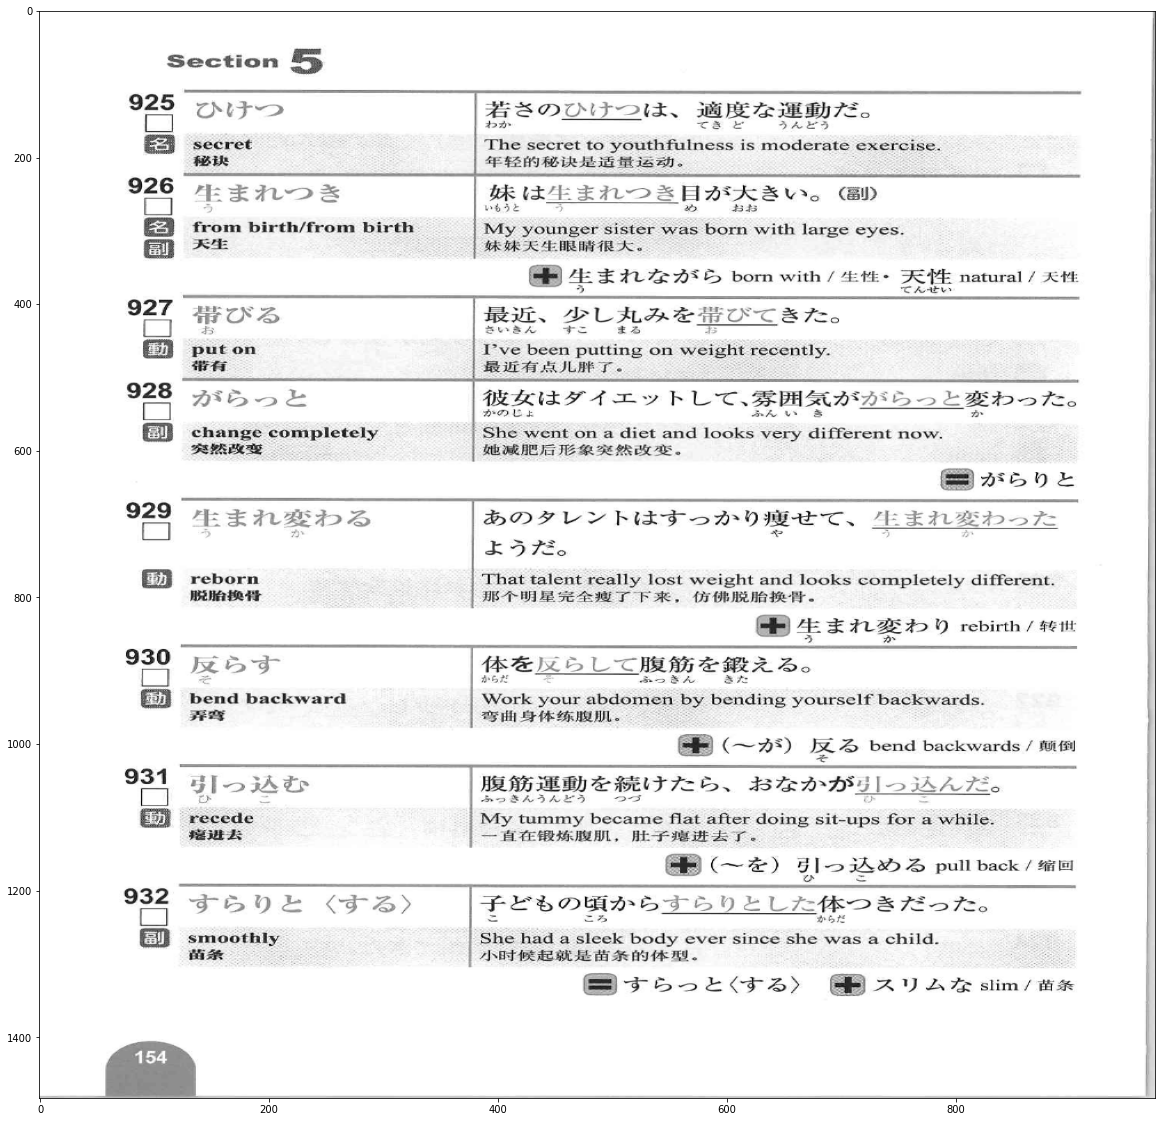

In [13]:
plt.figure(figsize = (20,20))
plt.imshow(img, aspect="auto")